# **MIS 311: INTRODUCTION TO BUSINESS ANALYTICS**
## Individual assignment: Portfolio Site
### **Topic: Supermarket Sale**

##### *Overview:* This analysis aims to explore the sales revenue of a supermarket, based on different brands, regions, and customer segments, along with a diverse range of products. Furthermore, the dataset clearly shows the quantity of items sold and the total revenue generated from those items.

In [121]:
# Import libraries
import pandas as pd
import numpy as np

In [122]:
np.nan

nan

In [123]:
pd.NA

<NA>

In [124]:
# Load data
supermarket_sale = pd.read_excel("/content/10 Supermarket Sale.xlsx")
supermarket_sale

,sale_id,branch,city,customer_type,product_name,product_category,quantity,total_price
0,1,A,New York,Member,Shampoo,Personal Care,3.0,17.66
1,2,B,Los Angeles,Normal,Notebook,Stationery,10.0,29.43
2,3,A,New York,Member,Apple,Fruits,15.0,19.26
3,4,A,Chicago,Normal,Detergent,Household,5.0,41.73
4,5,B,Los Angeles,Member,Orange Juice,Beverages,7.0,26.22
...,...,...,...,...,...,...,...,...
248,246,A,New York,Member,Notebook,Beverages,9.0,176.23
249,247,A,Chicago,Normal,Detergent,Beverages,3.0,28.28
250,248,A,New York,Member,Apple,Fruits,17.0,246.11
251,249,A,New York,Normal,Detergent,Personal Care,19.0,195.37


### **1. Checking and Handling Data Type**

In [125]:
# Check the number of rows and columns
supermarket_sale.shape

(253, 8)

In [126]:
supermarket_sale.dtypes

,0
sale_id,int64
branch,object
city,object
customer_type,object
product_name,object
product_category,object
quantity,float64
total_price,float64


In [127]:
# Handling the data type of "sale_id" column into object type
supermarket_sale["sale_id"] = pd.to_numeric(supermarket_sale.sale_id).astype(object)

In [128]:
# Handling the data type of "quantity" column into int type
supermarket_sale["quantity"] = pd.to_numeric(supermarket_sale.quantity, errors='coerce').fillna(0).astype(int)

In [129]:
# Check the result
supermarket_sale.dtypes

,0
sale_id,object
branch,object
city,object
customer_type,object
product_name,object
product_category,object
quantity,int64
total_price,float64


### **2. Data Cleaning**

#### 2.1. Identify the missing value

Using `.isna()` method to finds out missing value

In [130]:
supermarket_sale.isna().iloc[27:37]

,sale_id,branch,city,customer_type,product_name,product_category,quantity,total_price
27,False,False,False,False,False,False,False,False
28,False,False,False,False,False,False,False,False
29,False,False,False,False,False,False,False,False
30,False,False,False,False,False,False,False,False
31,False,False,False,False,False,True,False,False
32,False,False,False,True,False,False,False,False
33,False,False,False,False,False,True,False,False
34,False,False,False,False,False,False,False,False
35,False,False,False,False,False,False,False,False
36,False,False,False,True,False,False,False,False


In [131]:
# Return the missing values by column
supermarket_sale.isna().sum()

,0
sale_id,0
branch,0
city,0
customer_type,3
product_name,0
product_category,6
quantity,0
total_price,0


#### 2.2. Handling Missing Data

Use the `.dropna()` method to removes rows with missing data.

In [132]:
# Drop all rows with NaN
df = supermarket_sale.dropna()
df

,sale_id,branch,city,customer_type,product_name,product_category,quantity,total_price
0,1,A,New York,Member,Shampoo,Personal Care,3,17.66
1,2,B,Los Angeles,Normal,Notebook,Stationery,10,29.43
2,3,A,New York,Member,Apple,Fruits,15,19.26
3,4,A,Chicago,Normal,Detergent,Household,5,41.73
4,5,B,Los Angeles,Member,Orange Juice,Beverages,7,26.22
...,...,...,...,...,...,...,...,...
248,246,A,New York,Member,Notebook,Beverages,9,176.23
249,247,A,Chicago,Normal,Detergent,Beverages,3,28.28
250,248,A,New York,Member,Apple,Fruits,17,246.11
251,249,A,New York,Normal,Detergent,Personal Care,19,195.37


In [133]:
# Save data to excel file for later uses
df.to_excel("/content/supermarket_sale_1.xlsx", index=False)

#### 2.3. Identifying Duplicate Rows

In [134]:
# Load data
df = pd.read_excel("/content/supermarket_sale_1.xlsx")
df

,sale_id,branch,city,customer_type,product_name,product_category,quantity,total_price
0,1,A,New York,Member,Shampoo,Personal Care,3,17.66
1,2,B,Los Angeles,Normal,Notebook,Stationery,10,29.43
2,3,A,New York,Member,Apple,Fruits,15,19.26
3,4,A,Chicago,Normal,Detergent,Household,5,41.73
4,5,B,Los Angeles,Member,Orange Juice,Beverages,7,26.22
...,...,...,...,...,...,...,...,...
239,246,A,New York,Member,Notebook,Beverages,9,176.23
240,247,A,Chicago,Normal,Detergent,Beverages,3,28.28
241,248,A,New York,Member,Apple,Fruits,17,246.11
242,249,A,New York,Normal,Detergent,Personal Care,19,195.37


In [135]:
# Check duplicate in the dataframe
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
239,False
240,False
241,False
242,False


In [136]:
df.duplicated().value_counts()

,count
False,241
True,3


#### 2.4. Removing Duplicate Rows

In [137]:
df.drop_duplicates(inplace=True)
df

,sale_id,branch,city,customer_type,product_name,product_category,quantity,total_price
0,1,A,New York,Member,Shampoo,Personal Care,3,17.66
1,2,B,Los Angeles,Normal,Notebook,Stationery,10,29.43
2,3,A,New York,Member,Apple,Fruits,15,19.26
3,4,A,Chicago,Normal,Detergent,Household,5,41.73
4,5,B,Los Angeles,Member,Orange Juice,Beverages,7,26.22
...,...,...,...,...,...,...,...,...
239,246,A,New York,Member,Notebook,Beverages,9,176.23
240,247,A,Chicago,Normal,Detergent,Beverages,3,28.28
241,248,A,New York,Member,Apple,Fruits,17,246.11
242,249,A,New York,Normal,Detergent,Personal Care,19,195.37


In [138]:
# Save data to excel file for later uses
df.to_excel("/content/supermarket_sale_2.xlsx", index=False)

### **3. Descriptive Statistic**


In [139]:
import matplotlib.pyplot as plt

In [140]:
# Load data
supermarket_sale_2 = pd.read_excel("/content/supermarket_sale_2.xlsx")
supermarket_sale_2.head()

,sale_id,branch,city,customer_type,product_name,product_category,quantity,total_price
0,1,A,New York,Member,Shampoo,Personal Care,3,17.66
1,2,B,Los Angeles,Normal,Notebook,Stationery,10,29.43
2,3,A,New York,Member,Apple,Fruits,15,19.26
3,4,A,Chicago,Normal,Detergent,Household,5,41.73
4,5,B,Los Angeles,Member,Orange Juice,Beverages,7,26.22


#### 4.1. The 1st insight: Find the product category with the highest total revenue.

In [141]:
# Calculate total revenue by product category
category_sales = supermarket_sale_2.groupby("product_category")["total_price"].sum().sort_values(ascending=False)
category_sales

,total_price
product_category,
Fruits,7450.12
Beverages,6463.17
Stationery,6255.25
Household,5704.90
Personal Care,4569.34


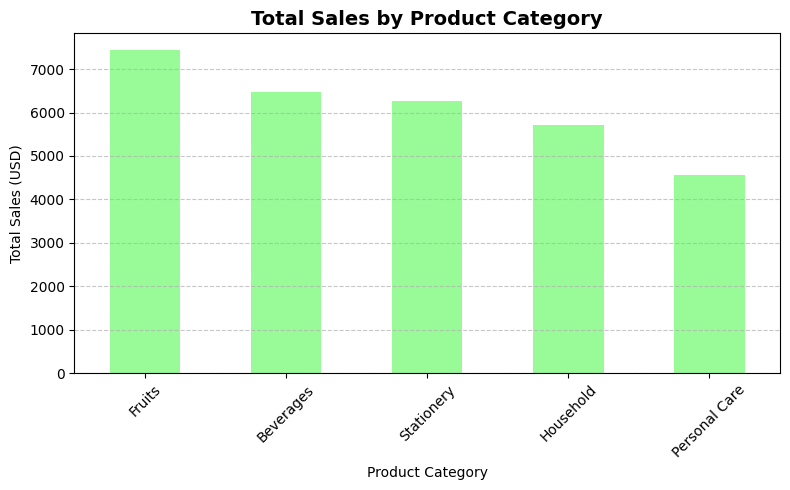

In [142]:
# Create a visualization for the 1st insight
plt.figure(figsize=(8,5))
category_sales.plot(kind='bar', color='palegreen')

plt.title("Total Sales by Product Category", fontsize=14, fontweight='bold')
plt.xlabel("Product Category")
plt.ylabel("Total Sales (USD)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 4.2. The second insight: Find the city that generates the most profit.

In [143]:
# Calculate revenue by city
city_sales = supermarket_sale_2.groupby("city")["total_price"].sum().sort_values(ascending=False)
city_sales

,total_price
city,
Chicago,10873.69
New York,10633.78
Los Angeles,8935.31


In [144]:
# Calculate the percentive of city_sales
city_sales_perc = city_sales / city_sales.sum() * 100
city_sales_perc

,total_price
city,
Chicago,35.718453
New York,34.930384
Los Angeles,29.351163


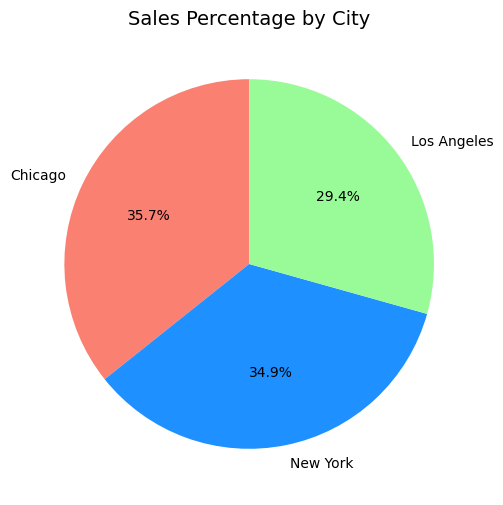

In [145]:
plt.figure(figsize=(6,6))
plt.pie(
    city_sales_perc,
    labels=city_sales_perc.index,
    autopct='%1.1f%%',     # display percentage on the chart
    startangle=90,         # rotate for better layout
    colors=['salmon', 'dodgerblue', 'palegreen']  # optional color set
)

plt.title('Sales Percentage by City', fontsize=14)
plt.show()